In [1]:
import pandas as pd

### Load Dataset

In [ ]:
normal_data = pd.read_csv('normal_dataset.csv')

### Normalize Data

In [36]:
# Splitting data

# Training data (Only normal traffic)
X_train = normal_data
y_train = normal_data.copy()
y_train['label'] = 1  # Label normal traffic as 1

# Evaluation data (Normal and abnormal traffic)
X_eval_feature = pd.read_csv(r'../dataset/evaluasi/traffic_dataset_eval.csv')
y_eval_feature = pd.read_csv(r'../dataset/evaluasi/traffic_dataset_label_eval.csv')

# Test data (Normal and abnormal traffic)
X_test = pd.read_csv(r'../dataset/test_data/traffic_test_dataset.csv')
y_test = pd.read_csv(r'../dataset/test_data/traffic_test_dataset_label.csv')

In [37]:
y_eval_feature.head()

,src_ip,dst_ip,src_mac,dst_mac,src_port,dst_port,protocol,timestamp,flow_duration,flow_byts_s,...,fwd_blk_rate_avg,bwd_blk_rate_avg,fwd_seg_size_avg,bwd_seg_size_avg,cwe_flag_count,subflow_fwd_pkts,subflow_bwd_pkts,subflow_fwd_byts,subflow_bwd_byts,label
0,10.0.0.1,10.0.0.2,00:00:00:00:00:01,da:37:d5:2b:a7:de,51084,80,6,2025-04-29 17:08:38,550.985336,1.894787e+06,...,0.0,0.000000e+00,79.166667,142.250000,0,6,4,475,569,1
1,10.0.0.5,10.0.0.2,00:00:00:00:00:05,da:37:d5:2b:a7:de,47092,80,6,2025-04-29 16:51:10,2533.674240,4.053402e+05,...,0.0,0.000000e+00,81.833333,134.000000,0,6,4,491,536,1
2,10.0.0.4,10.0.0.2,00:00:00:00:00:04,da:37:d5:2b:a7:de,55948,80,6,2025-04-29 18:24:12,64804.315567,1.112802e+07,...,0.0,1.208627e+07,70.285714,32712.181818,0,21,22,1476,719668,1
3,10.0.0.6,10.0.0.2,00:00:00:00:00:06,da:37:d5:2b:a7:de,53860,80,6,2025-04-29 18:44:15,1492.977142,6.932457e+05,...,0.0,0.000000e+00,81.833333,136.000000,0,6,4,491,544,1
4,10.0.0.1,10.0.0.2,00:00:00:00:00:01,da:37:d5:2b:a7:de,51548,80,6,2025-04-29 19:06:44,758.647919,1.353724e+06,...,0.0,0.000000e+00,81.833333,134.000000,0,6,4,491,536,1


In [38]:
missing_counts_X_eval_feature = X_eval_feature.isnull().sum()  # Count missing values in each column
print(missing_counts_X_eval_feature[missing_counts_X_eval_feature > 0]) # Print missing values count

missing_counts_X_train = X_train.isnull().sum()  # Count missing values in each column
print(missing_counts_X_train[missing_counts_X_train > 0]) # Print missing values count

missing_counts_X_test = X_test.isnull().sum()  # Count missing values in each column
print(missing_counts_X_test[missing_counts_X_test > 0]) # Print missing values count

Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)


In [39]:
non_numeric_columns_feature = X_eval_feature.select_dtypes(exclude=['number']).columns  # Select non-numeric columns
print(non_numeric_columns_feature)  # Print non-numeric columns

non_numeric_columns = X_train.select_dtypes(exclude=['number']).columns  # Select non-numeric columns
print(non_numeric_columns)  # Print non-numeric columns

non_numeric_columns_test = X_test.select_dtypes(exclude=['number']).columns  # Select non-numeric columns
print(non_numeric_columns_test)  # Print non-numeric columns

Index(['src_ip', 'dst_ip', 'src_mac', 'dst_mac', 'timestamp'], dtype='object')
Index(['src_ip', 'dst_ip', 'src_mac', 'dst_mac', 'timestamp'], dtype='object')
Index(['src_ip', 'dst_ip', 'src_mac', 'dst_mac', 'timestamp'], dtype='object')


In [40]:
# drop non-numeric columns + src_port , dst_port
X_eval_feature.drop(columns=non_numeric_columns_feature, inplace=True)  # Drop non-numeric columns
X_eval_feature.drop(columns=['src_port', 'dst_port'], inplace=True)  # Drop src_port and dst_port columns

X_train.drop(columns=non_numeric_columns, inplace=True)  # Drop non-numeric columns
X_train.drop(columns=['src_port', 'dst_port'], inplace=True)  # Drop src_port and dst_port columns

X_test.drop(columns=non_numeric_columns_test, inplace=True)  # Drop non-numeric columns
X_test.drop(columns=['src_port', 'dst_port'], inplace=True)  # Drop src_port and dst_port columns

In [41]:
# Perlihatkan jumlah data dengan label -1 pada y_eval_feature
print("Jumlah data dengan label -1 pada y_eval_feature:", y_eval_feature[y_eval_feature['label'] == -1].shape[0])
# Perlihatkan jumlah data dengan label 1 pada y_eval_feature
print("Jumlah data dengan label 1 pada y_eval_feature:", y_eval_feature[y_eval_feature['label'] == 1].shape[0])

Jumlah data dengan label -1 pada y_eval_feature: 5271
Jumlah data dengan label 1 pada y_eval_feature: 6000


In [42]:
# Perlihatkan jumlah data dengan label -1 pada y_test
print("Jumlah data dengan label -1 pada y_test:", (y_test['label'] == -1).sum())
# Perlihatkan jumlah data dengan label 1 pada y_test
print("Jumlah data dengan label 1 pada y_test:", (y_test['label'] == 1).sum())

Jumlah data dengan label -1 pada y_test: 2500
Jumlah data dengan label 1 pada y_test: 1500


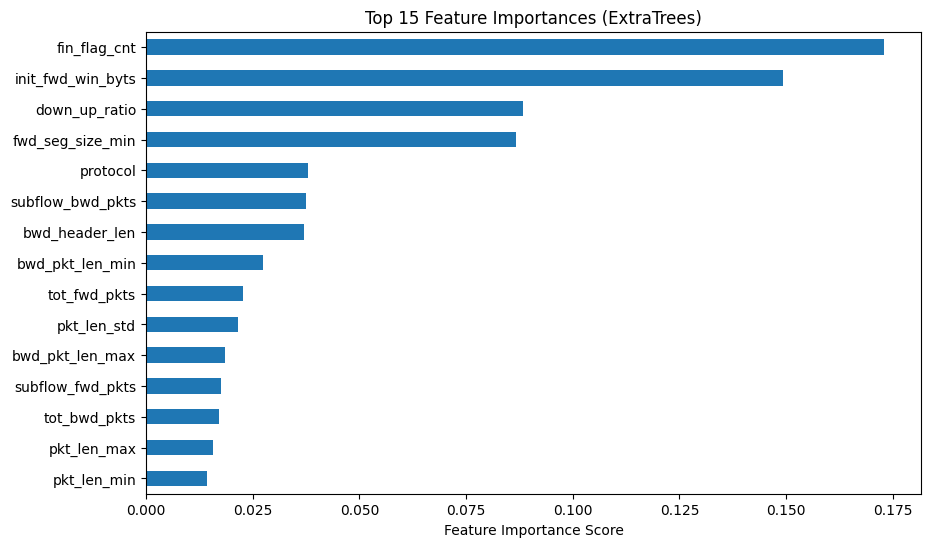

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Fit model ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf.fit(X_eval_feature, y_eval_feature['label'])

# Buat Series dari importance-nya
feat_imp = pd.Series(clf.feature_importances_, index=X_eval_feature.columns)

# Tampilkan 15 fitur terpenting
top_features = feat_imp.nlargest(15)
top_features.plot(kind='barh', figsize=(10, 6))
plt.title("Top 15 Feature Importances (ExtraTrees)")
plt.xlabel("Feature Importance Score")
plt.gca().invert_yaxis()
plt.show()

In [44]:
import json

# Misalnya, fitur yang ingin disimpan adalah top_features.index
features = top_features.index.tolist()  # Konversi ke list agar kompatibel dengan JSON

# Simpan ke file JSON
with open('feature_columns.json', 'w') as json_file:
    json.dump(features, json_file)

print("✅ Features saved to 'feature_coolumns.json'")

✅ Features saved to 'feature_coolumns.json'


In [45]:
top_features

fin_flag_cnt         0.172933
init_fwd_win_byts    0.149187
down_up_ratio        0.088401
fwd_seg_size_min     0.086763
protocol             0.037917
subflow_bwd_pkts     0.037551
bwd_header_len       0.037025
bwd_pkt_len_min      0.027321
tot_fwd_pkts         0.022761
pkt_len_std          0.021538
bwd_pkt_len_max      0.018508
subflow_fwd_pkts     0.017532
tot_bwd_pkts         0.017050
pkt_len_max          0.015623
pkt_len_min          0.014243
dtype: float64

In [46]:
X_train_top = X_train[top_features.index]
X_eval_feature_top = X_eval_feature[top_features.index]
X_test_top = X_test[top_features.index]

In [47]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import pandas as pd

results = []

for contamination in [0.05, 0.1, 0.125, 0.15, 0.175, 0.2]:
    for random_state in [5, 10, 20, 30, 32, 42, 50, 52, 60, 77, 90, 100, 123]:
        pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("model", IsolationForest(contamination=contamination, random_state=random_state))
        ])
        
        pipeline.fit(X_train_top)  # Hanya fitur (tanpa label)
        preds = pipeline.predict(X_test_top)

        y_true = y_test['label']

        acc = accuracy_score(y_true, preds)
        f1 = f1_score(y_true, preds, pos_label=-1)
        precision = precision_score(y_true, preds, pos_label=-1)
        recall = recall_score(y_true, preds, pos_label=-1)

        # Confusion Matrix untuk FPR
        tn, fp, fn, tp = confusion_matrix(y_true, preds, labels=[1, -1]).ravel()
        fpr = fp / (fp + tn)

        results.append((contamination, random_state, acc, precision, recall, f1, fpr, pipeline))

# Konversi ke DataFrame
results_df = pd.DataFrame(results, columns=['contamination', 'random_state', 'accuracy', 'precision', 'recall', 'f1_score', 'fpr', 'pipeline'])

# Filter berdasarkan performa ideal
ideal = results_df[
    (results_df['accuracy'] >= 0.90) &
    (results_df['precision'] >= 0.90) &
    (results_df['recall'] >= 0.90) &
    (results_df['f1_score'] >= 0.90) &
    (results_df['fpr'] <= 0.5)
]

# Tampilkan pipeline terbaik
print("Kombinasi ideal:")
print(ideal.sort_values(by='f1_score', ascending=False))


Kombinasi ideal:
    contamination  random_state  accuracy  precision  recall  f1_score  \
8           0.050            60   0.97850   0.970382  0.9960  0.983024   
11          0.050           100   0.97825   0.967093  0.9992  0.982884   
4           0.050            32   0.97700   0.965224  0.9992  0.981918   
2           0.050            20   0.97550   0.962992  0.9992  0.980762   
0           0.050             5   0.97475   0.961879  0.9992  0.980184   
..            ...           ...       ...        ...     ...       ...   
52          0.175             5   0.93950   0.911743  1.0000  0.953834   
62          0.175            90   0.93925   0.911411  1.0000  0.953652   
75          0.200            90   0.93550   0.906454  1.0000  0.950932   
74          0.200            77   0.93425   0.904814  1.0000  0.950029   
65          0.200             5   0.93400   0.904486  1.0000  0.949848   

         fpr                                           pipeline  
8   0.050667  (StandardScale

In [18]:
# Import ke csv dan excel untuk model terbaik yang telah diurutkan secara descending berdasarkan f1_score
ideal_sorted = ideal.sort_values(by='f1_score', ascending=False)
ideal_sorted.to_csv('ideal_results_coba.csv', index=False)
ideal_sorted.to_excel('ideal_results_coba.xlsx', index=False)

In [48]:
# Simpan pipeline terbaik
if not ideal.empty:
    best_pipeline = ideal.iloc[8]['pipeline']
    import joblib
    joblib.dump(best_pipeline, "best_isolation_forest_model.pkl")
    print("Model pipeline disimpan sebagai 'best_isolation_forest_model.pkl'")
else:
    print("Tidak ada kombinasi yang memenuhi semua metrik ideal.")

Model pipeline disimpan sebagai 'best_isolation_forest_model.pkl'


In [49]:
best_pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 IsolationForest(contamination=0.05, random_state=60))])

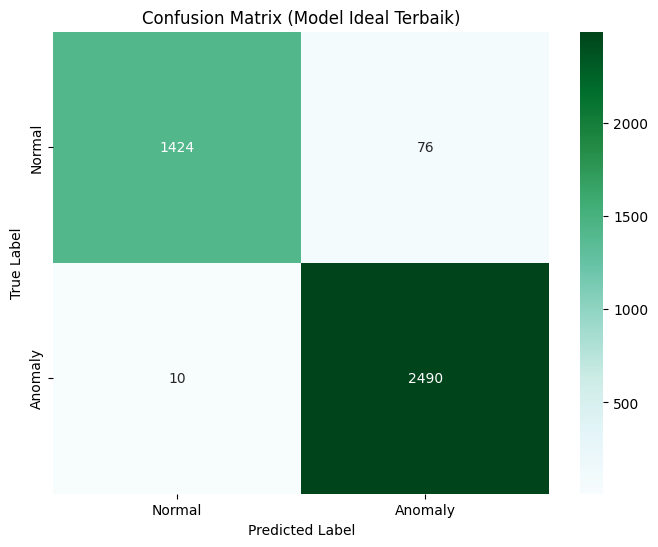

In [50]:
# Buat Confussion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_preds_ideal = best_pipeline.predict(X_test_top)

# 2. Buat confusion matrix menggunakan prediksi dari model ideal
cm_ideal = confusion_matrix(y_test['label'], y_preds_ideal, labels=[1, -1]) # Menggunakan y_preds_ideal

plt.figure(figsize=(8, 6))
sns.heatmap(cm_ideal, annot=True, fmt='d', cmap='BuGn',
            xticklabels=['Normal', 'Anomaly'], 
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix (Model Ideal Terbaik)') # Judul bisa disesuaikan
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

📌 Best threshold with FPR <= 10%:
threshold   -0.017323
accuracy     0.982500
precision    0.976471
recall       0.996000
f1_score     0.986139
fpr          0.040000
Name: 58, dtype: float64


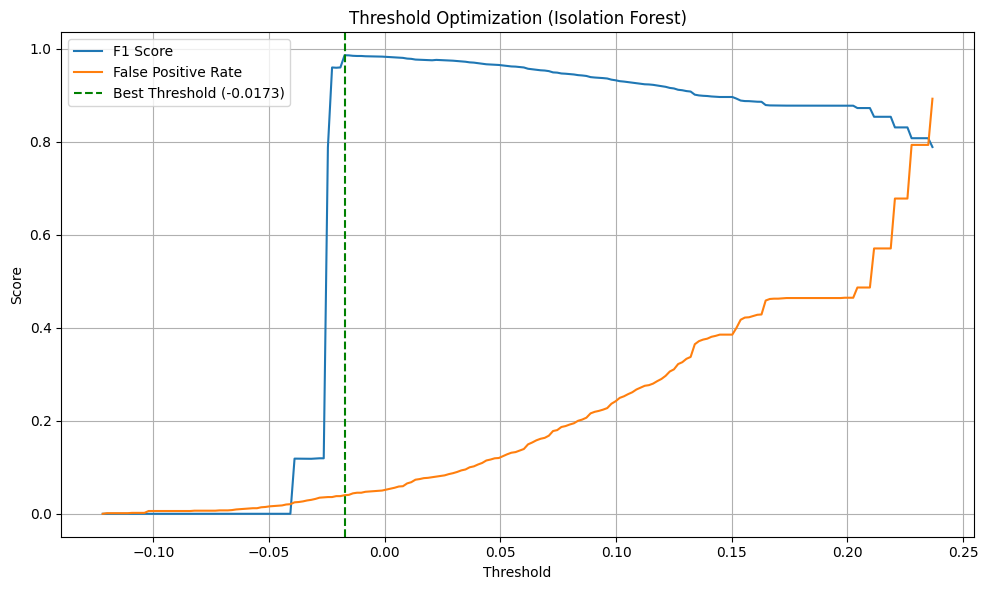

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Hitung skor decision_function dari best_pipeline pada data uji
y_scores = best_pipeline.decision_function(X_test_top)

# 2. Siapkan label ground truth biner (1=anomali, 0=normal)
y_true = y_test.loc[X_test_top.index, 'label']
y_true_bin = (y_true == -1).astype(int)

# 3. Uji banyak threshold
thresholds = np.linspace(min(y_scores), max(y_scores), 200)
results = []

for t in thresholds:
    y_pred = (y_scores < t).astype(int)  # 1=anomali, 0=normal

    acc = accuracy_score(y_true_bin, y_pred)
    prec = precision_score(y_true_bin, y_pred, zero_division=0)
    rec = recall_score(y_true_bin, y_pred)
    f1 = f1_score(y_true_bin, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_true_bin, y_pred).ravel()
    fpr = fp / (fp + tn + 1e-6)

    results.append({
        'threshold': t,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1,
        'fpr': fpr
    })

df_thresholds = pd.DataFrame(results)

# 4. Filter threshold dengan FPR <= 10%
low_fpr_df = df_thresholds[df_thresholds['fpr'] <= 0.1]

# 5. Pilih threshold dengan F1-score tertinggi di antara FPR rendah
if not low_fpr_df.empty:
    best_low_fpr = low_fpr_df.loc[low_fpr_df['f1_score'].idxmax()]
    print("📌 Best threshold with FPR <= 10%:")
    print(best_low_fpr)
else:
    print("❌ Tidak ada threshold dengan FPR <= 10%")
    best_low_fpr = df_thresholds.loc[df_thresholds['f1_score'].idxmax()]
    print("📌 Best threshold overall:")
    print(best_low_fpr)

# 6. Visualisasi threshold vs F1 dan FPR
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_thresholds, x='threshold', y='f1_score', label='F1 Score')
sns.lineplot(data=df_thresholds, x='threshold', y='fpr', label='False Positive Rate')
plt.axvline(best_low_fpr['threshold'], color='green', linestyle='--', label=f"Best Threshold ({best_low_fpr['threshold']:.4f})")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold Optimization (Isolation Forest)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

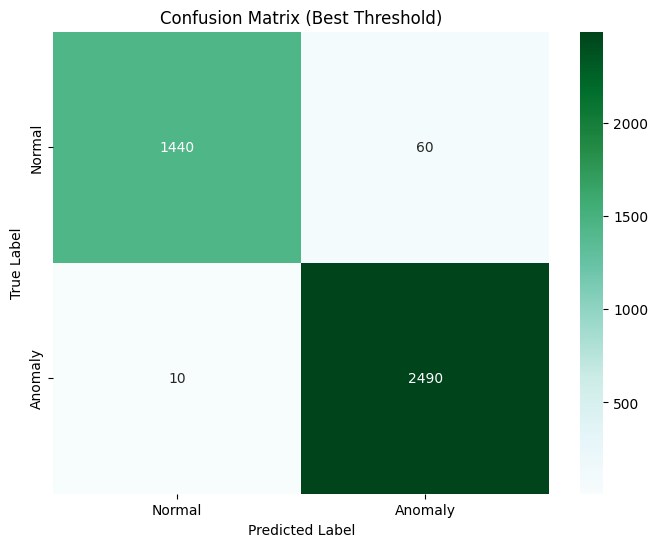

Accuracy: 0.9825
Precision: 0.9764705882352941
Recall: 0.996
F1 Score: 0.9861386138613861
False Positive Rate: 0.03999999997333333


In [66]:
# confusion matrix untuk threshold terbaik
y_pred_best = (y_scores < best_low_fpr['threshold']).astype(int)
cm_best = confusion_matrix(y_true_bin, y_pred_best)
plt.figure(figsize=(8, 6))  
sns.heatmap(cm_best, annot=True, fmt='d', cmap='BuGn',
            xticklabels=['Normal', 'Anomaly'], 
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix (Best Threshold)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# print hasil confusion matrix, accuracy, precision, recall, f1_score, dan fpr
print("Accuracy:", accuracy_score(y_true_bin, y_pred_best))
print("Precision:", precision_score(y_true_bin, y_pred_best, zero_division=0))
print("Recall:", recall_score(y_true_bin, y_pred_best))
print("F1 Score:", f1_score(y_true_bin, y_pred_best))
print("False Positive Rate:", best_low_fpr['fpr'])




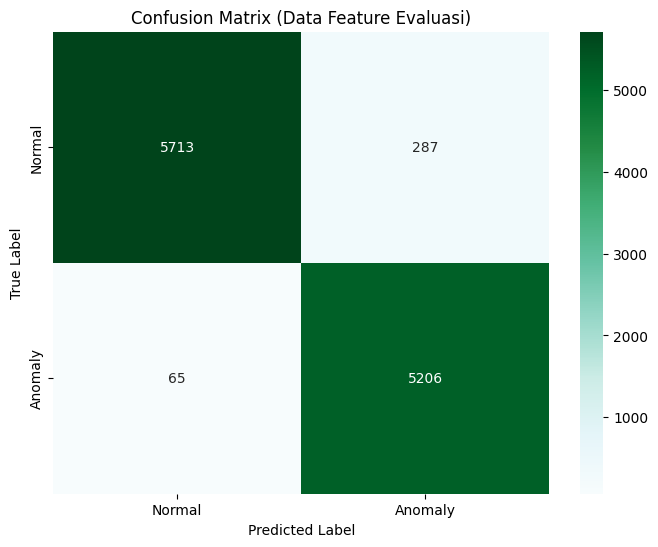

Evaluasi Data:
Akurasi: 0.9688
Presisi: 0.9478
Recall: 0.9877
F1-Score: 0.9673


In [64]:
# Terapkan model pada data evaluasi
y_eval_preds = best_pipeline.predict(X_eval_feature_top)
# Buat confusion matrix untuk data evaluasi
cm_eval = confusion_matrix(y_eval_feature['label'], y_eval_preds, labels=[1, -1])  # Menggunakan y_eval_preds
plt.figure(figsize=(8, 6))
sns.heatmap(cm_eval, annot=True, fmt='d', cmap='BuGn',
            xticklabels=['Normal', 'Anomaly'], 
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix (Data Feature Evaluasi)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print akurasi, presisi, recall, dan F1-score untuk data evaluasi
eval_accuracy = accuracy_score(y_eval_feature['label'], y_eval_preds)
eval_precision = precision_score(y_eval_feature['label'], y_eval_preds, pos_label=-1, zero_division=0)
eval_recall = recall_score(y_eval_feature['label'], y_eval_preds, pos_label=-1)
eval_f1 = f1_score(y_eval_feature['label'], y_eval_preds, pos_label=-1)

print(f"Evaluasi Data:\n"
        f"Akurasi: {eval_accuracy:.4f}\n"
        f"Presisi: {eval_precision:.4f}\n"
        f"Recall: {eval_recall:.4f}\n"
        f"F1-Score: {eval_f1:.4f}")

### DATA UJI ###

In [3]:
import pandas as pd

In [4]:
data_uji = pd.read_csv(r'../dataset/data_uji/traffic_dataset.csv')
data_uji_label = pd.read_csv(r'../dataset/data_uji/traffic_dataset_label.csv')

In [1]:
import json
# Baca top features dari file JSON
with open('../feature_columns.json', 'r') as json_file:
    top_features_list = json.load(json_file)

In [33]:
# Load Model
import joblib
best_model = joblib.load("../best_isolation_forest_model.pkl")

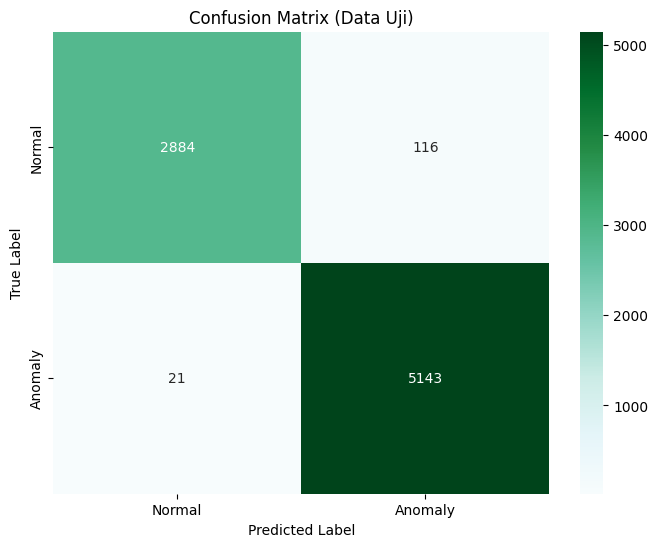

Data Uji (Evaluasi dengan Threshold Manual):
Akurasi  : 0.9832
Presisi  : 0.9779
Recall   : 0.9959
F1-Score : 0.9869
False Positive Rate: 0.0387


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# ====== 1. Hitung anomaly score dari data uji ======
X_data_uji_top = data_uji[top_features.index]  # gunakan fitur yang sama dengan pelatihan
anomaly_scores = best_model.decision_function(X_data_uji_top)  # Nilai score: lebih rendah = lebih anomali

# ====== 2. Terapkan threshold terbaik ======
best_threshold = -0.017323
preds_binary = (anomaly_scores < best_threshold).astype(int)  # 1 = anomali, 0 = normal

# ====== 3. Konversi ke label standar (-1 = anomali, 1 = normal) ======
data_uji_preds = np.where(preds_binary == 1, -1, 1)  # anomali → -1, normal → 1

# ====== 4. Filter label NaN agar evaluasi valid ======
data_uji_label_valid = data_uji_label.dropna(subset=['label'])
X_data_uji_top = X_data_uji_top.loc[data_uji_label_valid.index]  # sinkronkan fitur
data_uji_preds = data_uji_preds[data_uji_label_valid.index]  # sinkronkan prediksi
y_true = data_uji_label_valid['label']

# ====== 5. Confusion Matrix ======
cm = confusion_matrix(y_true, data_uji_preds, labels=[1, -1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuGn',
            xticklabels=['Normal', 'Anomaly'], 
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix (Data Uji)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ====== 6. Evaluasi Metrik ======
acc = accuracy_score(y_true, data_uji_preds)
precision = precision_score(y_true, data_uji_preds, pos_label=-1, zero_division=0)
recall = recall_score(y_true, data_uji_preds, pos_label=-1)
f1 = f1_score(y_true, data_uji_preds, pos_label=-1)

print("Data Uji (Evaluasi dengan Threshold Manual):")
print(f"Akurasi  : {acc:.4f}")
print(f"Presisi  : {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")
print(f"False Positive Rate: {cm[0, 1] / (cm[0, 1] + cm[0, 0]):.4f}")  # FPR = FP / (FP + TN)